In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1,cache=True)

In [3]:
x,y=mnist["data"],mnist["target"]

In [4]:
print(x.shape)

(70000, 784)


In [7]:
%matplotlib inline


In [8]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=x[26000]

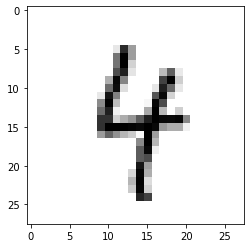

In [9]:
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

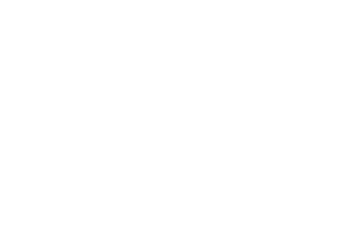

In [16]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [17]:
print(y_train)


['5' '0' '4' ... '5' '6' '8']


In [18]:
import numpy as np
y_train=y_train.astype(np.int8)
print(y_train)


[5 0 4 ... 5 6 8]


In [19]:
y_train_4=(y_train==4)
print(y_train_4)


[False False  True ... False False False]


In [20]:
y_test_4=(y_test==4)
print(y_test_4)

[False False False ... False False False]


In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)


In [24]:
sgd_clf.fit(x_train,y_train_4)


SGDClassifier(random_state=42)


In [25]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
# The classifier guesses that this image represents a   4 (True).


In [ ]:
#Performance Measures


In [ ]:
There are many performance measures available, 
Measuring Accuracy Using   
Cross-Validation
 Confusion Matrix
 Precision and Recall
 The ROC Curve


In [28]:
#Measuring Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_4, cv=3, scoring="accuracy")



array([0.9671 , 0.97645, 0.9687 ])

In [ ]:
#Measuring Accuracy Using Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confusion matrix.
To compute the confusion matrix, 
you first need to have a set of predictions, 
so they can be compared to the actual targets. 
You could make predictions on the test set.


In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

In [37]:
#Measuring Accuracy Using Precision and Recall 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_4, y_train_pred)

0.8149175527816305

In [38]:
recall_score(y_train_4, y_train_pred) 

0.905169462512838

In [40]:
# Measuring Accuracy Using F1 score.
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_pred)


0.8576757764982564